<a href="https://colab.research.google.com/github/ExpertsVision/ML_DS_Tutorials/blob/master/lstm_cnn_sentiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import os
from lxml import html
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# Movie reviews sentiment analysis
In this tutorial we will be applying LSTM and CNN for the classification of movies reviews. We won't be following standard steps of any NLP project e.g. removal of stop words, normalization etc. and will just show implementation of LSTM and CNN. In both scenarios we will be using embedding layer. There are five sentiments which we will be classifying. 

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings



from bs4 import BeautifulSoup
import re
from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()



import tensorflow as tf




from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense,Dropout,Embedding,LSTM,Conv2D,Flatten,MaxPooling2D
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('/content/drive/My Drive/train_reviews.tsv', sep='\t')

In [4]:
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [5]:
x_train = df['Phrase']
y_train = df['Sentiment']

In [6]:
vocab_size = 15000
embedding_dim = 200
max_length = 150
batch_size=256
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [7]:
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(list(x_train))

In [8]:
X_train = tokenizer.texts_to_sequences(x_train)
X_train = pad_sequences(X_train, maxlen=max_length)

In [9]:
Y = to_categorical(y_train.values)

In [10]:

train_x, val_x, train_y, val_y = train_test_split(X_train, Y, test_size=0.2)

In [11]:
train_x.shape, train_y.shape, val_x.shape, val_y.shape

((124848, 150), (124848, 5), (31212, 150), (31212, 5))

# Single Layer LSTM

In [12]:
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.LSTM(64,dropout=0.4,recurrent_dropout=0.4 ),    
    tf.keras.layers.Dense(5, activation='softmax')
])

model_lstm.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_lstm.summary()





Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 150, 200)          3000000   
_________________________________________________________________
lstm (LSTM)                  (None, 64)                67840     
_________________________________________________________________
dense (Dense)                (None, 5)                 325       
Total params: 3,068,165
Trainable params: 3,068,165
Non-trainable params: 0
_________________________________________________________________


For this tutorial, since accuracy is not our concern, so I am just setting epocs to 5. 

In [13]:
num_epochs = 5
history_lstm = model_lstm.fit(train_x, train_y, epochs=num_epochs, batch_size=batch_size, validation_data=(val_x, val_y), verbose=1)

Epoch 1/5
488/488 [==============================] - 582s 1s/step - loss: 1.0197 - accuracy: 0.5902 - val_loss: 0.8565 - val_accuracy: 0.6526
Epoch 2/5
488/488 [==============================] - 586s 1s/step - loss: 0.7914 - accuracy: 0.6764 - val_loss: 0.8162 - val_accuracy: 0.6691
Epoch 3/5
488/488 [==============================] - 588s 1s/step - loss: 0.7235 - accuracy: 0.7005 - val_loss: 0.8093 - val_accuracy: 0.6726
Epoch 4/5
488/488 [==============================] - 584s 1s/step - loss: 0.6781 - accuracy: 0.7167 - val_loss: 0.8150 - val_accuracy: 0.6730
Epoch 5/5
488/488 [==============================] - 584s 1s/step - loss: 0.6401 - accuracy: 0.7298 - val_loss: 0.8256 - val_accuracy: 0.6704


In [14]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

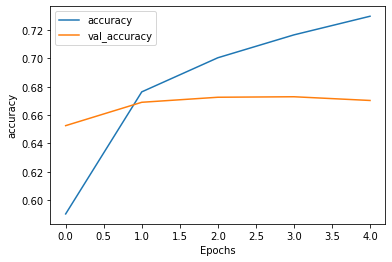

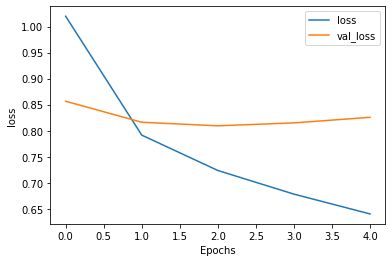

In [15]:
plot_graphs(history_lstm, 'accuracy')
plot_graphs(history_lstm, 'loss')

#Single Layer Bi-directional LSTM

In [16]:
model_blstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
      
    tf.keras.layers.Dense(5, activation='softmax')
])

model_blstm.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_blstm.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 150, 200)          3000000   
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               135680    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 645       
Total params: 3,136,325
Trainable params: 3,136,325
Non-trainable params: 0
_________________________________________________________________


In [17]:

history_blstm = model_blstm.fit(train_x, train_y, epochs=num_epochs, batch_size=batch_size, validation_data=(val_x, val_y), verbose=2)

Epoch 1/5
488/488 - 557s - loss: 0.9924 - accuracy: 0.6030 - val_loss: 0.8474 - val_accuracy: 0.6565
Epoch 2/5
488/488 - 554s - loss: 0.7687 - accuracy: 0.6850 - val_loss: 0.8078 - val_accuracy: 0.6710
Epoch 3/5
488/488 - 567s - loss: 0.6944 - accuracy: 0.7112 - val_loss: 0.8132 - val_accuracy: 0.6720
Epoch 4/5
488/488 - 571s - loss: 0.6407 - accuracy: 0.7296 - val_loss: 0.8193 - val_accuracy: 0.6724
Epoch 5/5
488/488 - 563s - loss: 0.5981 - accuracy: 0.7452 - val_loss: 0.8314 - val_accuracy: 0.6746


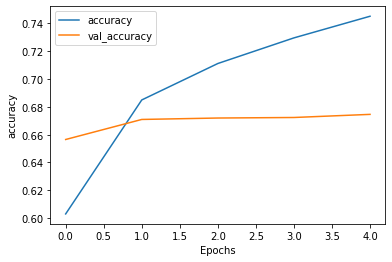

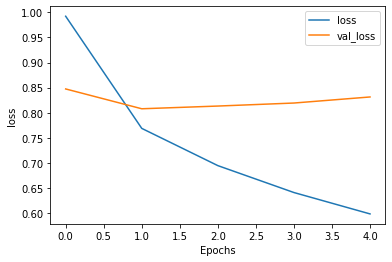

In [18]:
plot_graphs(history_blstm, 'accuracy')
plot_graphs(history_blstm, 'loss')

# Multi-Layer Bi-directional LSTM


In [20]:
model_mblstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])
 
model_mblstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_mblstm.summary()




Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 150, 200)          3000000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 150, 128)          135680    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 325       
Total params: 3,181,381
Trainable params: 3,181,381
Non-trainable params: 0
_________________________________________________________________


In [21]:

mblstm_history = model_mblstm.fit(train_x, train_y, epochs=num_epochs, batch_size=batch_size, validation_data=(val_x, val_y), verbose=2)

Epoch 1/5
488/488 - 793s - loss: 0.3426 - accuracy: 0.5927 - val_loss: 0.3005 - val_accuracy: 0.6494
Epoch 2/5
488/488 - 791s - loss: 0.2775 - accuracy: 0.6781 - val_loss: 0.2863 - val_accuracy: 0.6689
Epoch 3/5
488/488 - 789s - loss: 0.2543 - accuracy: 0.7074 - val_loss: 0.2842 - val_accuracy: 0.6722
Epoch 4/5
488/488 - 794s - loss: 0.2371 - accuracy: 0.7293 - val_loss: 0.2901 - val_accuracy: 0.6747
Epoch 5/5
488/488 - 792s - loss: 0.2232 - accuracy: 0.7448 - val_loss: 0.2941 - val_accuracy: 0.6725


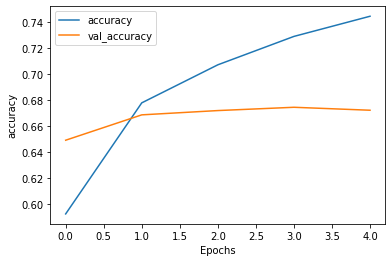

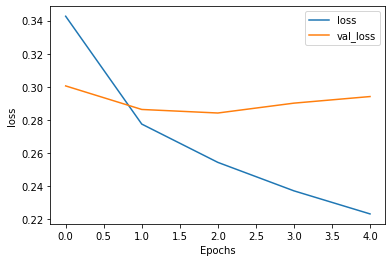

In [22]:
plot_graphs(mblstm_history, 'accuracy')
plot_graphs(mblstm_history, 'loss')

# 1-D CNN


In [23]:
model_cnn = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])
model_cnn.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_cnn.summary()



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 150, 200)          3000000   
_________________________________________________________________
conv1d (Conv1D)              (None, 146, 128)          128128    
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 24)                3096      
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 125       
Total params: 3,131,349
Trainable params: 3,131,349
Non-trainable params: 0
_________________________________________________________________


In [24]:

cnn_history = model_cnn.fit(train_x, train_y, epochs=num_epochs, batch_size=batch_size, validation_data=(val_x, val_y), verbose=2)

Epoch 1/5
488/488 - 345s - loss: 0.3422 - accuracy: 0.5946 - val_loss: 0.2962 - val_accuracy: 0.6540
Epoch 2/5
488/488 - 350s - loss: 0.2668 - accuracy: 0.6917 - val_loss: 0.2849 - val_accuracy: 0.6726
Epoch 3/5
488/488 - 346s - loss: 0.2331 - accuracy: 0.7334 - val_loss: 0.2930 - val_accuracy: 0.6730
Epoch 4/5
488/488 - 350s - loss: 0.2073 - accuracy: 0.7642 - val_loss: 0.3062 - val_accuracy: 0.6657
Epoch 5/5
488/488 - 345s - loss: 0.1858 - accuracy: 0.7903 - val_loss: 0.3276 - val_accuracy: 0.6626


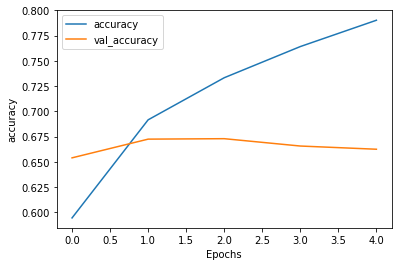

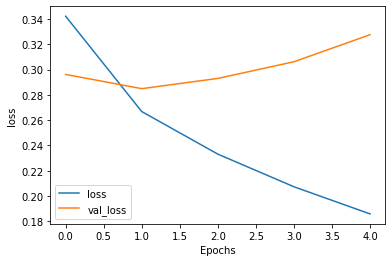

In [25]:
plot_graphs(cnn_history, 'accuracy')
plot_graphs(cnn_history, 'loss')